In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
df = pd.read_csv('./DataSet.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.384459,0.733863,-7.950000e-07,0.305103,0.662457,0.007510,0.261370,0.573788,0.005625,0.224733,...,0.621929,0.429524,-0.045429,0.627556,0.370509,-0.057343,0.601878,0.321157,-0.064413,fa
1,0.432905,0.758721,-4.190000e-07,0.322904,0.656030,-0.009076,0.265172,0.563117,-0.019573,0.234436,...,0.691468,0.425548,-0.045990,0.700856,0.359910,-0.065490,0.682041,0.303733,-0.076957,fa
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,fa
3,0.408896,0.963374,-4.310000e-07,0.317337,0.861122,-0.042097,0.263011,0.741786,-0.073506,0.237238,...,0.752633,0.660164,-0.121201,0.785297,0.587629,-0.154700,0.784539,0.515476,-0.178205,fa
4,0.271372,0.911371,-4.930000e-07,0.191852,0.802524,-0.019764,0.148339,0.693291,-0.040219,0.108322,...,0.582365,0.587454,-0.099238,0.603931,0.516190,-0.122474,0.595994,0.449261,-0.136125,fa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48737,0.427219,0.907872,6.860000e-07,0.271725,0.802921,-0.073758,0.192353,0.660329,-0.108982,0.143037,...,0.812450,0.519575,-0.121424,0.866853,0.446293,-0.144544,0.912453,0.371508,-0.161859,cha
48738,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cha
48739,0.550279,0.827625,3.280000e-07,0.412029,0.759657,-0.030859,0.331368,0.671587,-0.037458,0.285920,...,0.841146,0.568741,-0.042185,0.887526,0.521173,-0.052966,0.928533,0.473284,-0.061940,cha
48740,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cha


In [26]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (48742, 64)


In [27]:
all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 14353


In [28]:
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

In [29]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.384459,0.733863,-7.950000e-07,0.305103,0.662457,0.007510,0.261370,0.573788,0.005625,0.224733,...,0.621929,0.429524,-0.045429,0.627556,0.370509,-0.057343,0.601878,0.321157,-0.064413,fa
1,0.432905,0.758721,-4.190000e-07,0.322904,0.656030,-0.009076,0.265172,0.563117,-0.019573,0.234436,...,0.691468,0.425548,-0.045990,0.700856,0.359910,-0.065490,0.682041,0.303733,-0.076957,fa
3,0.408896,0.963374,-4.310000e-07,0.317337,0.861122,-0.042097,0.263011,0.741786,-0.073506,0.237238,...,0.752633,0.660164,-0.121201,0.785297,0.587629,-0.154700,0.784539,0.515476,-0.178205,fa
4,0.271372,0.911371,-4.930000e-07,0.191852,0.802524,-0.019764,0.148339,0.693291,-0.040219,0.108322,...,0.582365,0.587454,-0.099238,0.603931,0.516190,-0.122474,0.595994,0.449261,-0.136125,fa
5,0.419392,0.744960,5.000000e-08,0.350285,0.682536,-0.049503,0.298431,0.617904,-0.090213,0.258378,...,0.698554,0.483312,-0.134285,0.749740,0.429010,-0.160775,0.787064,0.379520,-0.175863,fa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48734,0.485346,0.754045,7.750000e-07,0.353374,0.720759,-0.060362,0.250616,0.662251,-0.106870,0.165735,...,0.752762,0.525410,-0.194526,0.818358,0.485202,-0.225418,0.872753,0.447455,-0.247843,cha
48736,0.431506,0.894180,8.300000e-07,0.268406,0.786722,-0.089022,0.184049,0.633666,-0.135411,0.130950,...,0.842533,0.489110,-0.153356,0.901484,0.411143,-0.180946,0.950408,0.333825,-0.200719,cha
48737,0.427219,0.907872,6.860000e-07,0.271725,0.802921,-0.073758,0.192353,0.660329,-0.108982,0.143037,...,0.812450,0.519575,-0.121424,0.866853,0.446293,-0.144544,0.912453,0.371508,-0.161859,cha
48739,0.550279,0.827625,3.280000e-07,0.412029,0.759657,-0.030859,0.331368,0.671587,-0.037458,0.285920,...,0.841146,0.568741,-0.042185,0.887526,0.521173,-0.052966,0.928533,0.473284,-0.061940,cha


In [30]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (34389, 64)


In [31]:
X = df.iloc[:, :63]
print("Features shape =", X.shape)

Y = df.iloc[:, 63]
print("Labels shape =", Y.shape)

Features shape = (34389, 63)
Labels shape = (34389,)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
svm = SVC(C=50, gamma=0.1, kernel='rbf')

In [34]:
svm.fit(x_train, y_train)

SVC(C=50, gamma=0.1)

In [35]:
print("Training score =", svm.score(x_train, y_train))

Training score = 0.9953836647159318


In [36]:
y_pred = svm.predict(x_test)

In [37]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 0.9902587961616749


In [38]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9902587961616749, 0.9902587961616749, 0.9902587961616749)

In [39]:
import joblib
joblib.dump(svm,'./model.pkl')

['./model.pkl']

In [40]:
labels = sorted(list(set(df['Output'])))
labels

['a',
 'aa',
 'ai',
 'am',
 'au',
 'ba',
 'cha',
 'da',
 'dha',
 'e',
 'fa',
 'ga',
 'ha',
 'i',
 'ja',
 'ka',
 'la',
 'ma',
 'na',
 'o',
 'pa',
 'ra',
 'sa',
 'ta',
 'tta',
 'u',
 'va',
 'ya']

<AxesSubplot:title={'center':'Confusion Matrix'}>

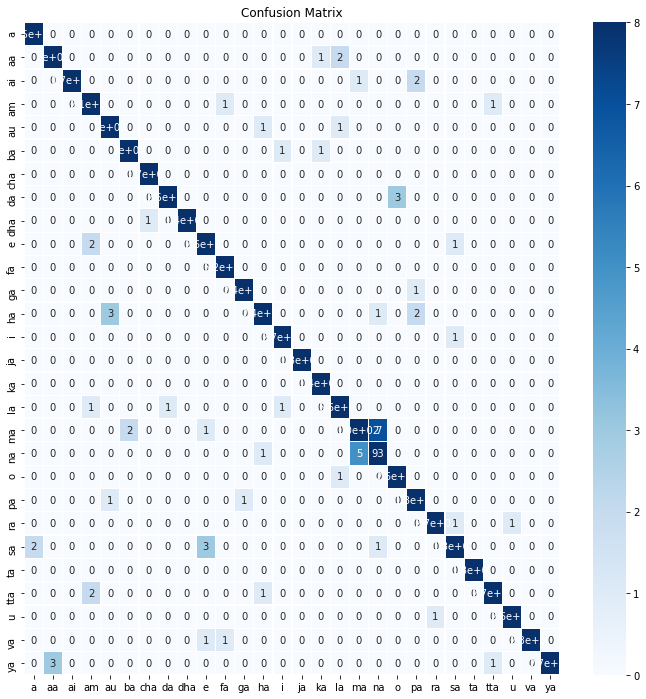

In [41]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     ax=ax
                    )
maping